# Stats and Public Health I                                     2022-05-09

### - Deliverable I
##  - VIRAJ P KUNTHE

In [1]:
#  import numpy, pandas, matplotlib and seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  load data from csv


snph_df = pd.read_csv('mosquito_data.csv')

# peeking into the data

snph_df.head(10)
# print(snph_df.info())

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
5,2019,39,21XX N CANNON DR,21,T054C,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.921777,-87.632140
6,2019,39,11XX W ROOSEVELT RD,11,T048,GRAVID,2019-09-26 00:09:00,3,Res,negative,CULEX RESTUANS,41.866915,-87.654919
7,2019,39,22XX W 51ST ST,22,T061,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.801048,-87.680425
8,2019,39,22XX N CANNON DR,22,T054A,GRAVID,2019-09-26 00:09:00,1,Ter,negative,CULEX TERRITANS,41.922737,-87.632450
9,2019,39,3XX W 104TH ST,3,T095,GRAVID,2019-09-26 00:09:00,1,Sal,negative,CULEX SALINARIUS,41.705328,-87.632955


In [3]:
# information about df


snph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


In [96]:
# shape of the df

snph_df.shape


(18495, 12)

### 1.1 Shape of the dataframe

The shape of the provided data frame is (18495, 12)

### 1.2 Converting Date column

The pandas function to_datetime is used to convert the 'Date' column to the date time format

In [5]:
# converting date column to date time format

snph_df['Date']= pd.to_datetime(snph_df['Date'])

# checking the result

snph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


###  1.3 Examples of categorical and numerical values

Categorical: 

- Trap type ( There are only certain types of traps)
- WNV present (Can have only 2 values - positive or negative)


Numerical : 

- Lat/Lon are numerical data types
- Date is a numerical data type

In [97]:
# Removing redundant columns

# Extracting week number and month from date column using pandas

snph_df['Week_num'] = snph_df['Date'].dt.week

snph_df['Month'] = snph_df['Date'].dt.month



C:\Users\Virajk\AppData\Local\Temp/ipykernel_21972/3093654870.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  snph_df['Week_num'] = snph_df['Date'].dt.week


### 1.4 Removing redundant columns

Columns 'Year', 'Week', 'Block' and 'Mosquito ID' are redundant as the information in them can be easily extracted from the 'Date', 'Address Block' and 'Species' columns.

The drop column feature is used to drop the above discussed columns.

In [7]:
snph_df = snph_df.drop(['Year', 'Week', 'Block', 'Mosquito ID'], axis=1)

In [16]:
snph_df.head()

,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Week_no.,Month
0,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN,39,9
1,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,39,9
2,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,39,9
3,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,39,9
4,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,39,9


Test results are organized in a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset) such that the number of mosquitoes are capped at 50. 

From a data analysis perspective it makes sense to club all the duplicates together such that an accurate number of mosquitoes caught in a trap at a specific time is represented.

This is achieved by summing the number of mosquitoes caught when grouped by the other parameters.

In [98]:
mosquito_df = pd.DataFrame(snph_df.groupby(['Address Block', 'Trap', 
                                     'Trap type', 'Date', 'Week_num',
                                     'Month',
                                     'WNV Present', 'Species', 
                                     'Lat', 'Lon'], dropna=False).sum()).reset_index()
mosquito_df['id'] = mosquito_df.index + 1

mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17350 entries, 0 to 17349
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Address Block    17350 non-null  object        
 1   Trap             17350 non-null  object        
 2   Trap type        17350 non-null  object        
 3   Date             17350 non-null  datetime64[ns]
 4   Week_num         17350 non-null  int64         
 5   Month            17350 non-null  int64         
 6   WNV Present      17350 non-null  object        
 7   Species          17350 non-null  object        
 8   Lat              15190 non-null  float64       
 9   Lon              15190 non-null  float64       
 10  Mosquito number  17350 non-null  int64         
 11  Week_no.         17350 non-null  int64         
 12  id               17350 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [43]:
# check null value counts by address block in Lon column


mosquito_df[(mosquito_df['Lat'].isna()) & ((mosquito_df['Lon'].isna()))].value_counts('Address Block')

Address Block
100XX W OHARE AIRPORT    1419
4XX W 127TH               252
100XX W OHARE             173
79XX S CHICAGO            127
81XX S ASHLAND            115
115XX S AVENUE L           24
65XX N OAK PARK AVE        17
30XX S HOYNE               12
98XX S AVENUE G            11
43XX N ASHLAND             10
dtype: int64

### Installing geopy (maps) library 

Installed geopy to fill in the NaN values in the 'Lat' and 'Lon' columns with values corresponding to the addresses in the 'Address Block' column

In [30]:
! pip install geopy

In [76]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="test")

location = geolocator.geocode("W 18TH ST") 

print((location.latitude, location.longitude))

(25.9233295, -97.518412)


This was a test to check whether we can use geopy to fill in the missing data. It is observed that when more common address names such as "W 18TH ST" show up, geopy confuses it with other addresses with the same name and returns an incorrect value.

Hence it is suggested that the NaN values be filled with '0' or 'unknown' until a better method is found to do the same.





In [99]:
# check airport location lat lon null values

mosquito_df.loc[(mosquito_df['Address Block'] == '100XX W OHARE AIRPORT') & (mosquito_df['Lat'].isna())]


,Address Block,Trap,Trap type,Date,Week_num,Month,WNV Present,Species,Lat,Lon,Mosquito number,Week_no.,id
173,100XX W OHARE AIRPORT,T900,GRAVID,2008-06-24 00:06:00,26,6,negative,CULEX RESTUANS,NaN,NaN,2,26,174
174,100XX W OHARE AIRPORT,T900,GRAVID,2008-07-14 00:07:00,29,7,negative,CULEX PIPIENS,NaN,NaN,1,29,175
175,100XX W OHARE AIRPORT,T900,GRAVID,2008-07-24 00:07:00,30,7,negative,CULEX PIPIENS,NaN,NaN,1,30,176
176,100XX W OHARE AIRPORT,T900,GRAVID,2008-07-29 00:07:00,31,7,negative,CULEX RESTUANS,NaN,NaN,10,31,177
177,100XX W OHARE AIRPORT,T900,GRAVID,2008-08-13 00:08:00,33,8,negative,CULEX RESTUANS,NaN,NaN,2,33,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,100XX W OHARE AIRPORT,T925,GRAVID,2015-08-06 00:08:00,32,8,positive,CULEX PIPIENS,NaN,NaN,66,192,1588
1588,100XX W OHARE AIRPORT,T925,GRAVID,2015-08-20 00:08:00,34,8,negative,CULEX PIPIENS,NaN,NaN,5,34,1589
1589,100XX W OHARE AIRPORT,T925,GRAVID,2015-08-20 00:08:00,34,8,negative,CULEX RESTUANS,NaN,NaN,47,34,1590
1590,100XX W OHARE AIRPORT,T925,GRAVID,2015-09-17 00:09:00,38,9,negative,CULEX PIPIENS,NaN,NaN,2,38,1591


The above values were pulled from the data frame to check whether all the values for 'Address Block' ='100XX W OHARE AIRPORT' have missing "Lat" Lon" values.

### BASIC EDA

The following analysis was done to check how prevalent the WNV was in mosquitoes by address block information.

In [100]:
# check WNV stats by address block

pd.crosstab(mosquito_df['WNV Present'],mosquito_df['Address Block'])


Address Block,100XX W OHARE,100XX W OHARE AIRPORT,101XX S STONY ISLAND AVE,104XX S OGLESBY AVE,104XX S VINCENNES AVE,105XX S CALIFORNIA AVE,109XX S COTTAGE GROVE AVE,10XX E 67TH ST,10XX W 95TH ST,111XX S ARTESIAN AVE,...,89XX S MUSKEGON AVE,8XX E 138TH ST,8XX E 91ST ST,8XX W 37TH PL,91XX W HIGGINS RD,93XX S DR MARTIN LUTHER KING JR DR,96XX S HOYNE AVE,96XX S LONGWOOD DR,98XX S AVENUE G,9XX W GARFIELD BLVD
WNV Present,,,,,,,,,,,,,,,,,,,,,
negative,160,1249,228,1,118,14,188,195,14,69,...,119,7,11,7,167,9,13,3,11,153
positive,13,170,109,0,18,0,19,24,4,8,...,14,0,0,0,72,3,0,0,0,16


### 2. BASIC EDA

The following analysis was done to check if there was any correlation between the number of mosquitoes caught in traps and the date on which the traps were checked. 

Since the date would provide us with a lot of information, the quantity of mosquitoes in the traps was correlated with month and week info instead.

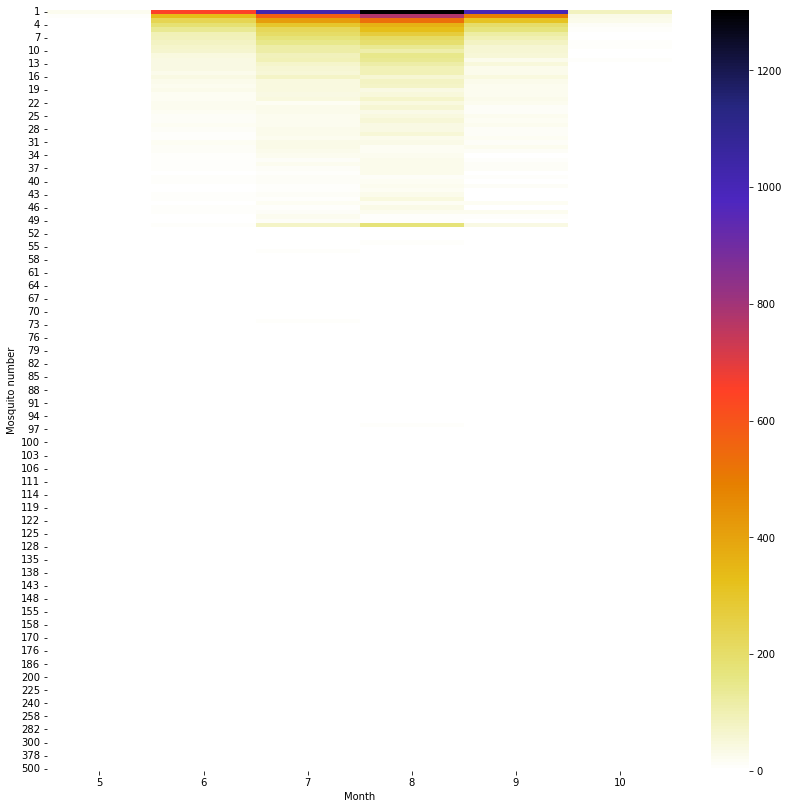

In [45]:
mosquito_month = pd.crosstab(mosquito_df['Mosquito number'],mosquito_df['Month'])


plt.figure(figsize=(14, 14))
sns.heatmap(mosquito_month, annot=False, cmap='CMRmap_r')
plt.show()

In [61]:
# snph_df['Year'] = snph_df['Date'].dt.year
mosquito_week_year = mosquito_df.groupby('Week_num').agg({'Mosquito number': 'sum'}).reset_index()
mosquito_week_year
# sns.heatmap(mosquito_week_year, annot=False, cmap='CMRmap_r')
# plt.show()

,Week_num,Mosquito number
0,22,161
1,23,3287
2,24,9123
3,25,9545
4,26,7739
5,27,4827
6,28,18001
7,29,12464
8,30,16875
9,31,21682


In [63]:
mosquito_df['Year'] = mosquito_df['Date'].dt.year

year_week_df = mosquito_df.groupby(['Year','Week_num']).agg({'Mosquito number': 'sum'}).reset_index()
week_df = mosquito_df.groupby(['Week_num']).agg({'Mosquito number': 'sum'}).reset_index()


<AxesSubplot:xlabel='Week_num', ylabel='Mosquito number'>

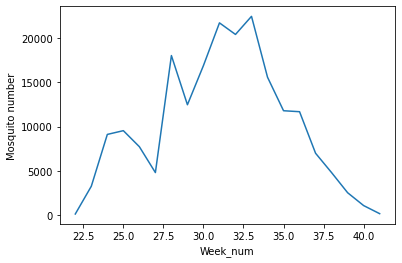

In [66]:
sns.lineplot(data=week_df, y="Mosquito number", x="Week_num", palette='CMRmap_r' )


This shows us that, the number of mosquitoes caught in traps greatly increases (unsurprisingly) in the warmer months of summer.

This is possibly due to a higher activity of mosquitoes during the warmer temperatures.

Further analysis is carried out by splitting the above data by year, to check whether any specific trennds emerge from the yearly data.

It is observed that there was large spike in the number of mosquitoes caught in the summer of 2016.


<AxesSubplot:xlabel='Week_num', ylabel='Mosquito number'>

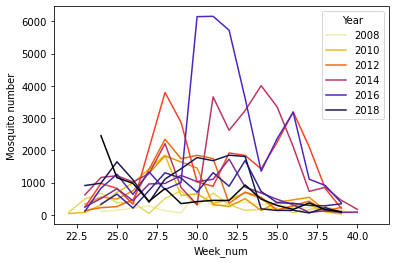

In [65]:
sns.lineplot(data=year_week_df, y="Mosquito number", x="Week_num", hue="Year", palette='CMRmap_r' )

### 3.1 Relationship between mosquito species and WNV prevalence.

By correlating Mosquito species with the WNV status of the tests, we find out that the WNV is most prevalent in the CULEX PIPIENS (pip) and CULEX RESTUANS (res) species of mosquitoes.

Conversely, of all the tests performed on the CULEX SLINARIUS and CULEX TERRITANS species, more than 96% were negative.

In [69]:
species_WNV = pd.crosstab(mosquito_df['Species'],mosquito_df['WNV Present']).apply(lambda r: r*100/r.sum(), axis=1).reset_index()

# species_WNV.columns

species_WNV

WNV Present,Species,negative,positive
0,CULEX PIPIENS,76.502311,23.497689
1,CULEX RESTUANS,81.475098,18.524902
2,CULEX SALINARIUS,96.846847,3.153153
3,CULEX TERRITANS,98.466594,1.533406


<Figure size 1008x1440 with 0 Axes>

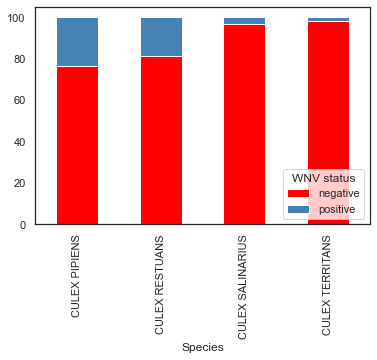

In [101]:
# set the figure size
plt.figure(figsize=(14, 20))


#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
species_WNV.set_index('Species').plot(kind='bar', stacked=True, color=['red', 'steelblue'])
plt.legend(loc='lower right', title='WNV status')

### 3.2 Relationship between the number of mosquitos caught and trap type

An average of the number of mosquitoes caught by all the types of traps used was calculated.

It is observed that the sentinel trap is the most effective at catching mosquitoes with 26 m osquitoes caught on an average.

In [72]:
mosquito_trap_type = mosquito_df.groupby(['Trap type']).agg({'Mosquito number': 'sum', 'Trap': 'count'}).reset_index()

mosquito_trap_type

,Trap type,Mosquito number,Trap
0,CDC,9883,474
1,GRAVID,186206,16678
2,OVI,1,1
3,SENTINEL,5134,197


,Trap type,Mosquito number
0,CDC,20.850211
1,GRAVID,11.164768
2,OVI,1.000000
3,SENTINEL,26.060914


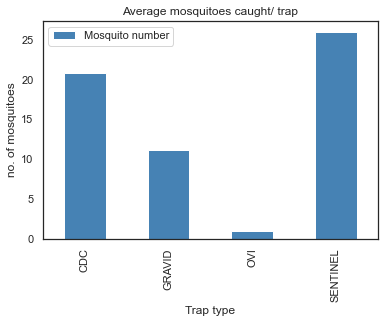

In [104]:
mosquito_avg_trap_type = mosquito_df.groupby(['Trap type']).agg({'Mosquito number': 'mean'}).reset_index()

mosquito_avg_trap_type.set_index('Trap type').plot(kind='bar', stacked=True, color=['steelblue'],ylabel='no. of mosquitoes', title ='Average mosquitoes caught/ trap') 

mosquito_avg_trap_type

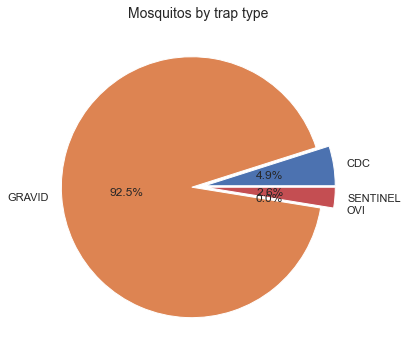

In [74]:
pie, ax = plt.subplots(figsize=[10,6])
labels = mosquito_trap_type['Trap type']
plt.pie(x=mosquito_trap_type['Mosquito number'], autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Mosquitos by trap type", fontsize=14);
# pie.savefig("DeliveryPieChart.png")

### 3.2 Relationship between the number of mosquito species and trap type


Correlation between the four different species of mosquitoes and the four different types of traps was carried out. 

It is apparent from the distribution of the species caught in each trap type that the 'CDC' typ of trap is more than twice as effective at trapping the CULEX PIPIENS 'pip'species of mosquito.

Similarly, the GRAVID and SENTINEL traps are more effective against the CULEX RESTUANS 'res' species of mosquitoes.

In [94]:
mosquito_species_trap_type = pd.crosstab(mosquito_df['Species'], mosquito_df['Trap type']).reset_index()

# mosquito_species_trap_type = mosquito_species_trap_type.drop('Trap type', axis=0)


mosquito_species_trap_type = mosquito_species_trap_type.set_index('Species')
mosquito_species_trap_type

Trap type,CDC,GRAVID,OVI,SENTINEL
Species,,,,
CULEX PIPIENS,322,4851,1,18
CULEX RESTUANS,120,10728,0,175
CULEX SALINARIUS,20,201,0,1
CULEX TERRITANS,12,898,0,3


### ADDITIONAL NOTES AND SUGGESTED FUTURE WORK

- It is observed that the OVI traop was deployed only once. As such, this row could be dropped from the dataframe as it has very little information to draw any kind of meaningful inference from.

- The latitude and longitude data could be truncated to the third decimal as a variation in the fourth and fifth decimal causes a variation in the group by analysis, but it has practically no difference in the actual location. This could be solved by the suggested truncation.

- An alternative to geopy should be found to fill in the missing Latitude and Longitude data